# 금융 데이터 분석 (3)
## RSI
```RSI(상대강도지수)```는 기술적 분석에서 가장 널리 사용되는 보조지표 중 하나로, 주가나 다른 자산의 가격 움직임의 속도와 변화를 측정하는 모멘텀 오실레이터입니다. J. 웰레스 와일더(J. Welles Wilder Jr.)가 개발했으며, 특정 기간 동안 주가가 상승한 변화량과 하락한 변화량의 평균값을 비교하여 현재 시장이 과매수(Overbought) 상태인지 과매도(Oversold) 상태인지를 판단하는 데 주로 사용됩니다.

RSI 값은 0과 100 사이에서 움직이며, 이 값을 통해 시장의 힘의 균형을 파악할 수 있습니다.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

In [5]:
df = fdr.DataReader("AAPL")
df

,Open,High,Low,Close,Volume,Adj Close
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310
...,...,...,...,...,...,...
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000
2025-06-27,201.889999,203.220001,200.000000,201.080002,73114100,201.080002


In [6]:
# 가격 변동 계산
delta = df['Close'].diff()
delta

1980-12-12         NaN
1980-12-15   -0.006696
1980-12-16   -0.008929
1980-12-17    0.002790
1980-12-18    0.003349
                ...   
2025-06-24   -1.199997
2025-06-25    1.259995
2025-06-26   -0.559998
2025-06-27    0.080002
2025-06-30    4.089996
Name: Close, Length: 11227, dtype: float64

In [7]:
# 상승분과 하락분 분리
gain = delta.where(delta > 0, 0).rolling(window = 14, min_periods = 1).mean()
loss = -delta.where(delta < 0, 0).rolling(window = 14, min_periods = 1).mean()

In [8]:
# Wilder's Smoothing Method (지수이동평균 방식) 적용
# pandas의 ewm (exponentially weighted moving average)을 사용하면 더 정확한 RSI를 계산할 수 있습니다.
gain = (delta.where(delta > 0, 0)).ewm(alpha=1/14, adjust=False).mean()
loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/14, adjust=False).mean()

In [9]:
# RS (상대강도) 계산
# loss가 0일 경우 DivisionByZeroError를 방지하기 위해 작은 값을 더해줍니다.
# RS = 평균 상승값 / 평균 하락값
rs = gain / (loss + 1e-10)
rs

1980-12-12    0.000000
1980-12-15    0.000000
1980-12-16    0.000000
1980-12-17    0.198367
1980-12-18    0.454796
                ...   
2025-06-24    0.940987
2025-06-25    1.024172
2025-06-26    0.984956
2025-06-27    0.990847
2025-06-30    1.315184
Name: Close, Length: 11227, dtype: float64

In [10]:
# RS값을 정규화하여 0과 100 사이의 값으로 변환한 RSI 계산
rsi = 100 - (100 / (1 + rs))
rsi

1980-12-12     0.000000
1980-12-15     0.000000
1980-12-16     0.000000
1980-12-17    16.553130
1980-12-18    31.261851
                ...    
2025-06-24    48.479811
2025-06-25    50.597074
2025-06-26    49.621039
2025-06-27    49.770113
2025-06-30    56.806887
Name: Close, Length: 11227, dtype: float64

In [24]:
def calculate_rsi(data, window=14):

    # Wilder's Smoothing Method (지수이동평균 방식) 적용
    # pandas의 ewm (exponentially weighted moving average)을 사용하면 더 정확한 RSI를 계산할 수 있습니다.
    
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).ewm(alpha=1/window, adjust=False, min_periods = window).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/window, adjust=False, min_periods = window).mean()

    rs = gain / (loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [25]:
df = fdr.DataReader("AAPL")
df['RSI'] = calculate_rsi(df)
df

,Open,High,Low,Close,Volume,Adj Close,RSI
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,NaN
...,...,...,...,...,...,...,...
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,48.479811
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,50.597074
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,49.621039
2025-06-27,201.889999,203.220001,200.000000,201.080002,73114100,201.080002,49.770113


In [13]:
import numpy as np

# np.where(조건, 참일때 값, 거짓일때 값)을 중첩하여 사용
df['Signal'] = np.where(df['RSI'] >= 70, '매도', '보유') # 70 이상이면 '매도'
df['Signal'] = np.where(df['RSI'] <= 30, '매수', df['Signal']) # 30 이하이면 '매수', 그 외에는 이전 값('매도' 또는 '보유') 유지
df

,Open,High,Low,Close,Volume,Adj Close,RSI,Signal
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,0.098597,NaN,보유
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,0.093453,NaN,보유
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.086594,NaN,보유
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.088737,NaN,보유
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.091310,NaN,보유
...,...,...,...,...,...,...,...,...
2025-06-24,202.589996,203.440002,200.199997,200.300003,54064000,200.300003,48.479811,보유
2025-06-25,201.449997,203.669998,200.619995,201.559998,39525700,201.559998,50.597074,보유
2025-06-26,201.429993,202.639999,199.460007,201.000000,50799100,201.000000,49.621039,보유
2025-06-27,201.889999,203.220001,200.000000,201.080002,73114100,201.080002,49.770113,보유


In [14]:
# 실제 매수/매도 신호가 발생한 날짜만 확인하기
trading_signals = df[(df['Signal'] == '매수') | (df['Signal'] == '매도')]
trading_signals[['Close', 'RSI', 'Signal']]

,Close,RSI,Signal
1981-03-11,0.096540,28.266361,매수
1981-05-22,0.140067,70.655821,매도
1981-05-27,0.147321,75.158978,매도
1981-05-28,0.147321,75.158978,매도
1981-05-29,0.147879,75.529192,매도
...,...,...,...
2025-03-12,216.979996,29.934015,매수
2025-03-13,209.679993,25.785609,매수
2025-04-04,188.380005,25.177914,매수
2025-04-07,181.460007,22.756734,매수


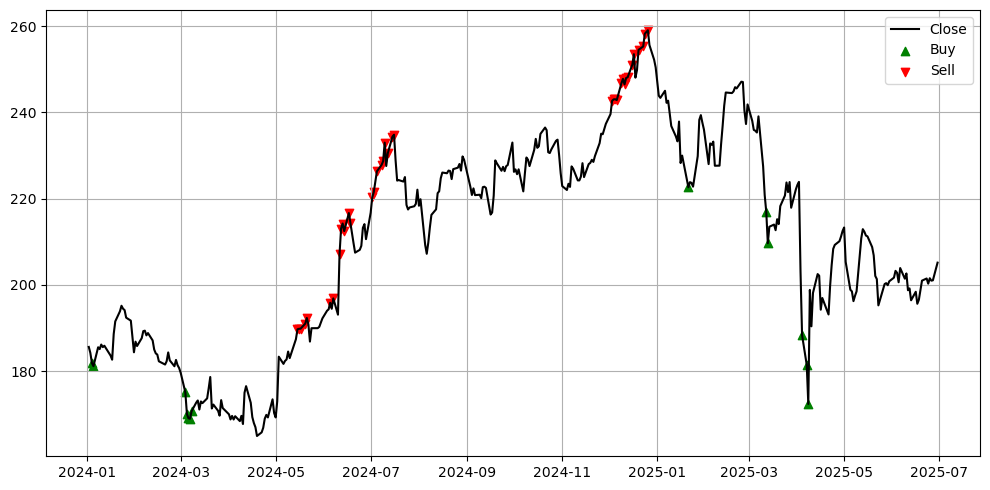

In [15]:
plt.figure(figsize = (10, 5))

df2 = df[df.index.year >= 2024]

plt.plot(df2.index, df2['Close'], color = 'k')

buy = df2[df2['Signal'] == '매수']
plt.scatter(buy.index, buy['Close'], marker = '^', color = 'green')

sell = df2[df2['Signal'] == "매도"]
plt.scatter(sell.index, sell['Close'], marker = 'v', color = 'red')

plt.legend(['Close', 'Buy', 'Sell'])
plt.grid()
plt.tight_layout()
plt.show()

* 백테스팅

In [16]:
import warnings
warnings.filterwarnings("ignore")

from backtesting import Backtest, Strategy
from backtesting.lib import crossover

Loading BokehJS ...

In [17]:
# RSI 계산 함수 정의 (backtesting 라이브러리에 맞게 약간 수정)
def rsi_func(price_series, n: int = 14):
    price_series = pd.Series(price_series)
    delta = price_series.diff()
    gain = delta.where(delta > 0, 0).ewm(alpha=1/n, adjust=False).mean()
    loss = (-delta.where(delta < 0, 0)).ewm(alpha=1/n, adjust=False).mean()
    rs = gain / (loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [18]:
class RsiStrategy(Strategy):
    # 전략에 사용할 파라미터 설정 (RSI 기간, 과매도/과매수 기준)
    rsi_period = 14
    oversold_threshold = 30
    overbought_threshold = 70

    def init(self):
        # 전략 초기화 시 RSI 지표를 미리 계산합니다.
        # self.I() 함수를 사용해 지표를 전략에 통합합니다.
        self.rsi = self.I(rsi_func, self.data.Close, self.rsi_period)

    def next(self):

        # 매수 조건: RSI가 과매도 기준선(30)을 상향 돌파하고, 현재 포지션이 없을 때
        if crossover(self.rsi, self.oversold_threshold) and not self.position:
            self.buy() # 매수 실행
    
        # 매도 조건: RSI가 과매수 기준선(70)을 하향 돌파하고, 현재 포지션이 있을 때
        elif crossover(self.overbought_threshold, self.rsi) and self.position:
            self.position.close() # 포지션 종료 (매도)

In [19]:
df = fdr.DataReader("AAPL")
bt = Backtest(df, RsiStrategy, cash = 10000, commission=0.002, exclusive_orders=True)

In [20]:
stats = bt.run()
print(stats)

Backtest.run:   0%|          | 0/11226 [00:00<?, ?bar/s]

Start                     1980-12-12 00:00:00
End                       2025-06-30 00:00:00
Duration                  16271 days 00:00:00
Exposure Time [%]                    32.59108
Equity Final [$]                  11877.55258
Equity Peak [$]                   19027.23974
Commissions [$]                    1399.64271
Return [%]                           18.77553
Buy & Hold Return [%]            159754.46561
Return (Ann.) [%]                     0.38696
Volatility (Ann.) [%]                29.49217
CAGR [%]                              0.26684
Sharpe Ratio                          0.01312
Sortino Ratio                         0.01976
Calmar Ratio                          0.00502
Alpha [%]                        -66070.34269
Beta                                  0.41369
Max. Drawdown [%]                   -77.13745
Avg. Drawdown [%]                   -13.26847
Max. Drawdown Duration    16035 days 00:00:00
Avg. Drawdown Duration     1621 days 00:00:00
# Trades                          

In [21]:
kospi = fdr.StockListing("KOSPI")
kospi.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,60650,1,850,1.42,60400,61100,60200,4940649,300088164600,359026039969300,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,292000,3,0,0.00,291000,294500,287000,847136,247015015750,212576690580000,728002365,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,998000,1,6000,0.60,994000,1003000,994000,21646,21537358500,71031652000000,71174000,STK
3,373220,KR7373220003,LG에너지솔루션,KOSPI,,295500,2,-1500,-0.51,296500,298000,292500,43998,13031357000,69147000000000,234000000,STK
4,034020,KR7034020008,두산에너빌리티,KOSPI,,67800,2,-600,-0.88,67800,69300,67600,2577748,176854364700,43430045698800,640561146,STK


In [35]:
from tqdm import tqdm

total = []

for i in tqdm(range(len(kospi))):

    try:
        row = kospi.iloc[i]
        code = row['Code']
        name = row['Name']
        df = fdr.DataReader(code)
        rsi = calculate_rsi(df).iloc[-1]
        total.append([code, name, rsi])
    except:
        continue

100%|████████████████████████████████████████████████████████████████████████████████| 962/962 [02:12<00:00,  7.26it/s]


In [39]:
pd.DataFrame(total, columns = ['Code', 'Name', 'RSI']).sort_values("RSI")

,Code,Name,RSI
808,007610,선도전기,5.115908e-13
851,005030,부산주공,2.331312e-05
766,091090,세원이앤씨,1.259375e-04
604,033180,KH 필룩스,3.729072e-04
737,003560,IHQ,8.009859e-04
...,...,...,...
206,001430,세아베스틸지주,8.525272e+01
31,316140,우리금융지주,8.541140e+01
745,009180,한솔로지스틱스,8.821567e+01
812,020760,일진디스플,8.992345e+01


# 연습문제
1. FinanceDataReader를 사용하여 삼성전자(종목코드: '005930.KS')의 2020년 1월 1일부터 현재까지의 주가 데이터를 불러와 df_samsung이라는 변수에 저장하세요.

In [4]:
import FinanceDataReader as fdr
# df = fdr.DataReader("005930")
# df_samsung = df[df.index.year >= 2020]
df_samsung = fdr.DataReader("005930", "2020")     # 애초부터 이렇게 불러오면됨 
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2025-06-30,61200,61200,59800,59800,17110294,-0.016447
2025-07-01,60400,61100,60200,60200,13650991,0.006689
2025-07-02,60200,60900,59800,60800,15047951,0.009967


2. calculate_rsi 함수를 사용하여 문제 1에서 불러온 df_samsung 데이터프레임의 RSI(14일 기준)를 계산하고, 'RSI'라는 새로운 컬럼을 추가하여 결과를 확인하세요.

In [30]:
df_samsung['RSI'] = calculate_rsi(df_samsung)
df_samsung

,Open,High,Low,Close,Volume,Change,RSI
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN
...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,63.012883
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,57.794753
2025-06-27,60100,61600,60000,60800,17340470,0.009967,59.752548


3. 단기 트레이딩 관점을 가정하여, 10일 기준의 RSI를 계산해 보세요. calculate_rsi 함수의 window 인자를 조절하여 df_samsung에 'RSI_10'이라는 컬럼으로 추가하고 마지막 5개 행을 출력하세요.

In [32]:
df_samsung['RSI_10'] = calculate_rsi(df_samsung, window = 10)
df_samsung = df_samsung.dropna()
df_samsung

,Open,High,Low,Close,Volume,Change,RSI,RSI_10
Date,,,,,,,,
2020-01-21,62000,62400,61200,61400,11142693,-0.016026,76.031784,74.200761
2020-01-22,60500,62600,60400,62300,15339565,0.014658,78.849917,77.678131
2020-01-23,61800,61800,60700,60800,14916555,-0.024077,65.109406,62.162235
2020-01-28,59400,59400,58300,58800,23664541,-0.032895,52.078285,47.967648
2020-01-29,59100,59700,58800,59100,16446102,0.005102,53.579102,49.875290
...,...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,63.012883,64.919012
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,57.794753,57.879809
2025-06-27,60100,61600,60000,60800,17340470,0.009967,59.752548,60.477077


4. np.where를 사용하여 새로운 매매 신호 기준을 적용해 보세요. 과매수 기준을 75, 과매도 기준을 25로 변경하여 'Signal_Custom' 이라는 새로운 컬럼을 df_samsung에 추가하세요.

In [36]:
import numpy as np
df_samsung["Signal_Custom"] = np.where(df_samsung["RSI"] >= 75, "매도", "보유")
df_samsung["Signal_Custom"] = np.where(df_samsung["RSI"] <= 25, "매수", df_samsung["Signal_Custom"])
df_samsung

,Open,High,Low,Close,Volume,Change,RSI,RSI_10,Signal_Custom
Date,,,,,,,,,
2020-01-21,62000,62400,61200,61400,11142693,-0.016026,76.031784,74.200761,매도
2020-01-22,60500,62600,60400,62300,15339565,0.014658,78.849917,77.678131,매도
2020-01-23,61800,61800,60700,60800,14916555,-0.024077,65.109406,62.162235,보유
2020-01-28,59400,59400,58300,58800,23664541,-0.032895,52.078285,47.967648,보유
2020-01-29,59100,59700,58800,59100,16446102,0.005102,53.579102,49.875290,보유
...,...,...,...,...,...,...,...,...,...
2025-06-25,61500,61600,60300,61300,23933612,0.013223,63.012883,64.919012,보유
2025-06-26,61300,61300,59900,60200,19402300,-0.017945,57.794753,57.879809,보유
2025-06-27,60100,61600,60000,60800,17340470,0.009967,59.752548,60.477077,보유


5. 문제 5에서 생성한 'Signal_Custom' 컬럼을 바탕으로, 2024년 이후 삼성전자 주가 차트에 '매수' 신호와 '매도' 신호를 각각 다른 색상의 마커(scatter)로 표시해 보세요.

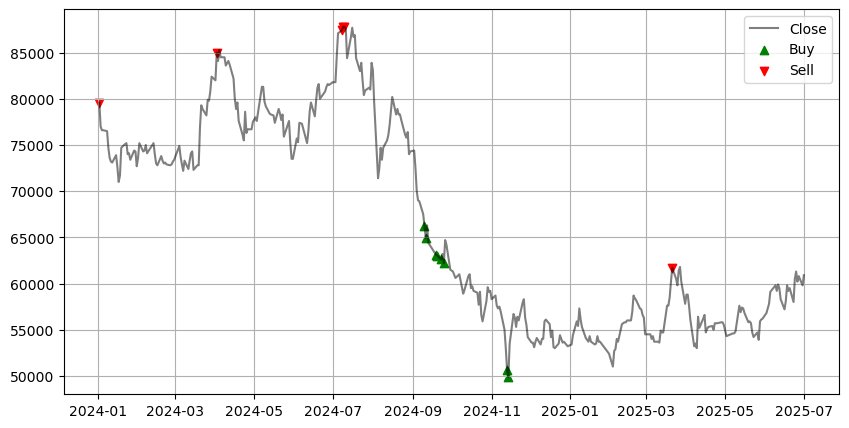

In [38]:
df2 = df_samsung[df_samsung.index.year >= 2024]

plt.figure(figsize = (10, 5))
plt.plot(df2['Close'], color = 'k', alpha = 0.5)

buy = df2[df2['Signal_Custom'] == "매수"]       # 매수 신호 (=사람들이 많이 구매해서 RSI 값이 올랐을때)
plt.scatter(buy.index, buy['Close'], marker = '^', color = 'green')

sell = df2[df2['Signal_Custom'] == "매도"]      # 매도 신호
plt.scatter(sell.index, sell['Close'], marker = 'v', color = 'red')

plt.legend(['Close', 'Buy', 'Sell'])
plt.grid()
plt.show()

6. backtesting 라이브러리와 RsiStrategy 클래스를 사용하여 마이크로소프트(MSFT) 주식에 대한 백테스팅을 실행하세요.
    * 초기 자본은 50,000달러, 수수료는 0.2%로 설정하고 백테스팅 결과를 출력하세요.

In [40]:
df = fdr.DataReader("MSFT")
bt = Backtest(df, RsiStrategy, cash = 50000, commission=0.002)

stats = bt.run()
stats

Backtest.run:   0%|          | 0/9900 [00:00<?, ?bar/s]

Start                     1986-03-13 00:00:00
End                       2025-06-30 00:00:00
Duration                  14354 days 00:00:00
Exposure Time [%]                    31.34027
Equity Final [$]                 649872.80862
Equity Peak [$]                  654582.80698
Commissions [$]                   33490.52818
Return [%]                         1199.74562
Buy & Hold Return [%]            511522.88558
Return (Ann.) [%]                     6.74558
Volatility (Ann.) [%]                22.29387
CAGR [%]                              4.60561
Sharpe Ratio                          0.30258
Sortino Ratio                         0.48837
Calmar Ratio                           0.1462
Alpha [%]                       -194076.46355
Beta                                  0.38175
Max. Drawdown [%]                   -46.13972
Avg. Drawdown [%]                     -6.3452
Max. Drawdown Duration     2454 days 00:00:00
Avg. Drawdown Duration      150 days 00:00:00
# Trades                          

7. '현대차(005380)' 주식에 대해 백테스팅을 실행하세요. 이번에는 RSI 기간을 10일, 과매도 기준을 25, 과매수 기준을 75로 설정하여 전략을 실행하고 결과를 출력하세요.

In [41]:
class RsiStrategy(Strategy):
    
    period = 10
    stock_buy = 25
    stock_sell = 75

    def init(self):
        self.rsi = self.I(rsi_func, self.data.Close, self.period)      # rsi값으로 초기값 설명

    def next(self):
        # RSI가 30을 상향 돌파하고, 현재 포지션이 없는 경우
        if crossover(self.rsi, self.stock_buy) and not self.position:
            self.buy()

        # RSI가 70을 하향 돌파하고 현재 포지션이 있을 때
        elif crossover(self.stock_sell, self.rsi) and self.position:
            self.position.close()

In [43]:
df = fdr.DataReader("005380")
bt = Backtest(df, RsiStrategy, cash = 100000, commission=0.002)

stats = bt.run()
stats

Backtest.run:   0%|          | 0/2999 [00:00<?, ?bar/s]

Start                     2013-04-11 00:00:00
End                       2025-07-01 00:00:00
Duration                   4464 days 00:00:00
Exposure Time [%]                     3.16667
Equity Final [$]                     121265.2
Equity Peak [$]                      135951.2
Commissions [$]                        1334.8
Return [%]                            21.2652
Buy & Hold Return [%]                 3.99002
Return (Ann.) [%]                     1.63279
Volatility (Ann.) [%]                 8.82355
CAGR [%]                              1.09439
Sharpe Ratio                          0.18505
Sortino Ratio                         0.30526
Calmar Ratio                          0.04432
Alpha [%]                            20.91792
Beta                                  0.08704
Max. Drawdown [%]                   -36.83895
Avg. Drawdown [%]                    -7.22986
Max. Drawdown Duration     1980 days 00:00:00
Avg. Drawdown Duration      399 days 00:00:00
# Trades                          